In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

import functions as myfunc

In [2]:
nodes = np.loadtxt("Lösung/Netz1D_p.dat")
number_of_nodes = len(nodes)
element_indices = np.loadtxt("Lösung/Elemente1D_t.dat")

coefficients_matrix = np.loadtxt("Lösung/Netz1D_Matrix_K.dat")
rhs_matrix = np.loadtxt("Lösung/Netz1D_Vector_D.dat").reshape((number_of_nodes, 1))

def alpha(x):
    """
    Piecewise function for alpha(x):
    - 3 in [1.5, 2.7]
    - x^2 elsewhere
    """
    x = np.asarray(x)
    return np.where((1.5 <= x) & (x <= 2.7), 3.0, np.square(x))

def beta(x):
    """
    Piecewise function for beta(x):
    - x / (x+1) in [1, 2]
    - x^2 elsewhere
    """
    x = np.asarray(x)
    return np.where((1 <= x) & (x <= 2), x / (x + 1), np.square(x))

def rhs(x):
    """
    Right-hand side f(x):
    - x in [2, 4]
    - x + 1 elsewhere
    """
    x = np.asarray(x)
    return np.where((2 <= x) & (x <= 4), x, x + 1)

def gamma(x):
    """
    Robin issue function gamma(x).
    Only for the lower bound!
    """
    return 0

In [3]:
DOMAIN_BOUNDARY = {
    "Lower Bound": 1,
    "Upper Bound": 4
}
BOUNDARY_CONDITION = {
    "Lower Bound": {
        "x": DOMAIN_BOUNDARY["Lower Bound"],
        "x Index": np.where(np.isclose(nodes, DOMAIN_BOUNDARY["Lower Bound"]))[0][0],
        "Gamma": gamma(DOMAIN_BOUNDARY["Lower Bound"]),
        "Rho": 6
    },
    "Upper Bound": {
        "x": DOMAIN_BOUNDARY["Upper Bound"],
        "x Index": np.where(np.isclose(nodes, DOMAIN_BOUNDARY["Upper Bound"]))[0][0],
        "Phi": 2
    }
}

In [4]:
coefficients_matrix, rhs_matrix = myfunc.add_robin_issue_values(coefficients_matrix, rhs_matrix, BOUNDARY_CONDITION)

coefficients_matrix, rhs_matrix = myfunc.reduce_matrices(coefficients_matrix, rhs_matrix, BOUNDARY_CONDITION)

In [5]:
reduced_solution = myfunc.solve_leq(coefficients_matrix, rhs_matrix)

solution = myfunc.insert_boundary_values(reduced_solution, number_of_nodes, BOUNDARY_CONDITION)
print(solution)

[[2.38200861]
 [4.18802701]
 [1.77340359]
 [1.85817605]
 [1.38991716]
 [4.85999304]
 [1.89034888]
 [2.43802205]
 [2.88207093]
 [4.22218172]
 [4.25683295]
 [1.68054895]
 [5.14043811]
 [3.07791295]
 [2.37576532]
 [3.16615516]
 [1.41528945]
 [2.79817119]
 [1.80278195]
 [1.62118742]
 [1.49181259]
 [1.85675412]
 [5.12407412]
 [1.61113683]
 [1.46508345]
 [3.8130198 ]
 [3.10148757]
 [1.77919956]
 [1.49513551]
 [1.57318093]
 [1.41530154]
 [3.84202637]
 [3.04248874]
 [1.97164869]
 [2.70766788]
 [2.98920581]
 [4.74425186]
 [3.7467632 ]
 [1.43143432]
 [3.89121519]
 [2.36951805]
 [2.88804393]
 [1.51527774]
 [1.61346358]
 [1.82700238]
 [2.00003292]
 [1.93365877]
 [1.66366811]
 [3.85177886]
 [1.38861916]
 [4.19935746]
 [2.93573699]
 [3.972201  ]
 [5.15689973]
 [1.87161212]
 [4.0668584 ]
 [2.95358128]
 [3.3356238 ]
 [2.82219665]
 [1.99287657]
 [1.38731719]
 [1.48699132]
 [3.01290939]
 [1.42094012]
 [2.45042719]
 [1.58692274]
 [4.4631641 ]
 [1.45793042]
 [2.26735852]
 [2.08904971]
 [1.53434216]
 [1.41

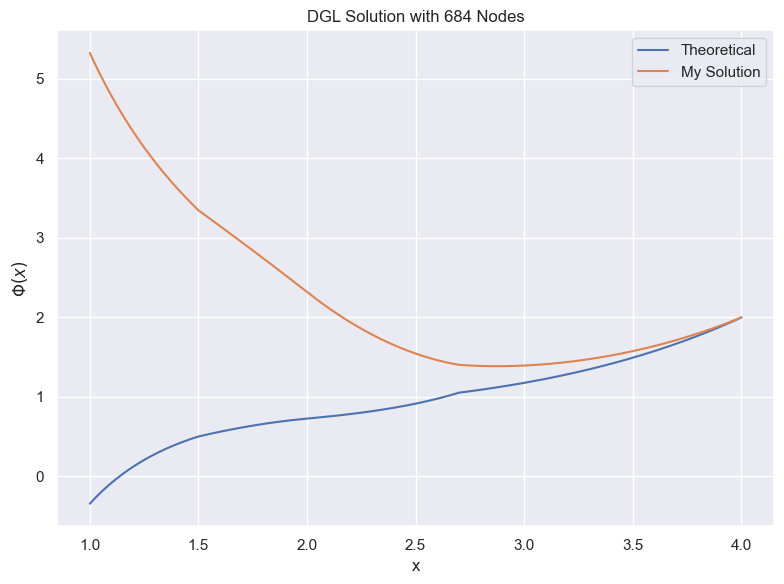

In [6]:
theoretical = np.loadtxt("Lösung/Netz1D_LoesungC.dat")
theoretical_df = myfunc.create_solution_df(nodes, theoretical)

solution_df = myfunc.create_solution_df(nodes, solution)


plt.figure(figsize=(8, 6))
plt.plot(theoretical_df["x"], theoretical_df["Phi"], label="Theoretical")
plt.plot(solution_df["x"], solution_df["Phi"], label="My Solution")

plt.xlabel("x")
plt.ylabel(r"$\Phi (x)$")
plt.title(f"DGL Solution with {number_of_nodes} Nodes")
plt.legend()

plt.tight_layout()
plt.show()

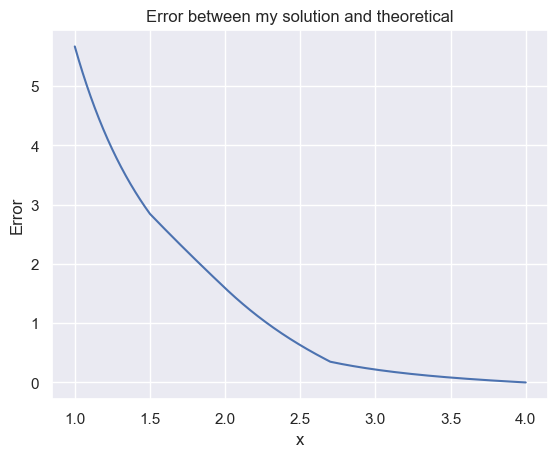

In [7]:
plt.plot(solution_df["x"], solution_df["Phi"]-theoretical_df["Phi"])
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error between my solution and theoretical")

plt.show()